_Author: Vania Elvina Afiati_                                                        
_Date: 1 March 2025_

# Credit Risk and Loan Approval Prediction Model

## Project Background
In today's increasingly complex financial landscape, accurately assessing credit risk is paramount for lenders. Traditional methods often fall short in capturing the nuances of borrower behavior and market dynamics, leading to suboptimal lending decisions and potential financial losses.  This project aims to address this challenge by developing a sophisticated machine learning model that predicts the likelihood of loan defaults. By leveraging a comprehensive dataset of both approved and rejected loan applications, this model will uncover hidden patterns and insights to enhance credit risk assessment accuracy. The ultimate goal is to empower lenders with data-driven tools to make more informed decisions, minimize risk, and optimize business outcomes.

## Objectives
1. Build different prediction models and evaluate each models
2. Choose the best model based on its evaluation metrics

## Import Libraries

In [171]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding

#### 1.1 Import Dataset

In [172]:
# import dataset
df = pd.read_csv("./dataset.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.2 Data Structure

In [173]:
# check dataset
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [174]:
print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 466285
Total Features : 75


#### 1.3 Data Description
| Feature | Description | Type | 
| :- | :- | :- |
| id | A unique LC assigned ID for the loan listing | Numerical |
| member_id | A unique LC assigned Id for the borrower member | Numerical |
| loan_amnt | The listed amount of the loan applied by the borrower | Numerical |
| funded_amnt | The total amount committed to that loan at that point in time | Numerical |
| funded_amnt_inv | The total amount committed to that loan by the investors at that point in time | Numerical |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60 | Categorical |
| int_rate | Interest rate on the loan | Numerical |
| installment | The monthly payment owed by the borrower if the loan originates | Numerical |
| grade | LC assigned loan grade | Categorical |
| sub_grade | LC assigned loan subgrade | Categorical |
| emp_title | The job title from the borrower when applying for the loan | Categorical |
| emp_length | Employment length in years | Categorical |
| home_ownership | The home ownership status from the borrower | Categorical |
| annual_inc | The self-reported annual income provided by the borrower during registration | Numerical |
| verification_status | Indicates if the income was verified by LC, not verified, or if the income source was verified | Categorical |
| issue_d | The month which the loan was funded | Categorical |
| loan_status | Loan payment status | Categorical |
| pymnt_plan |Indicates if a payment plan has been put in place for the loan | Categorical |
| url | URL for the LC page with listing data | Categorical |
| desc | Loan description provided by the borrower | Categorical |
| purpose | A category provided by the borrower for the loan request | Categorical |
| title | The loan title provided by the borrower | Categorical |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application | Categorical |
| addr_state | The state provided by the borrower in the loan application | Categorical |
| dti | Total monthly debt payments excluding mortgage and the requested LC loan divided by monthly income | Numerical |
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years | Numerical |
| earliest_cr_line | The date the borrower's earliest reported credit line was opened | Categorical |
| inq_last_6mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) | Numerical |
| mths_since_last_delinq | The number of months since the borrower's last delinquency | Numerical |
| mths_since_last_record | The number of months since the last public record | Numerical |
| open_acc | Number of open trades | Numerical |
| pub_rec | Number of derogatory public records | Numerical |
|  revol_bal | Total credit revolving balance | Numerical |
| revol_util | Revolving line utilization rate or the amount of credit the borrower is using relative to all available revolving credit | Numerical |
| total_acc | The total number of credit lines currently in the borrower's credit file | Numerical |
| initial_list_status | The initial listing status of the loan | Categorical |
| out_prncp | Remaining outstanding principal for total amount funded | Numerical |
| out_prncp_inv | Remaining outstanding principal for portion of total amount funded by investors | Numerical |
| total_pymnt| Payments received to date for total amount funded | Numerical |
| total_pymnt_inv | Payments received to date for portion of total amount funded by investors | Numerical |
| total_rec_prncp | Principal received to date | Numerical |
| total_rec_int | Interest received to date | Numerical |
| total_rec_late_fee | Late fees received to date | Numerical |
| recoveries | The funds that are recovered by a lender after a borrower has failed to meet their repayment obligations | Numerical |
| collection_recovery_fee | Post charge off collection fee | Numerical |
| last_pymnt_d | Last month payment was received | Categorical |
| last_pymnt_amnt | Last total payment amount received | Numerical |
| next_pymnt_d | Next scheduled payment date | Categorical |
| last_credit_pull_d | The most recent month LC pulled credit for this loan | Categorical |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections | Numerical |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating | Numerical |
| policy_code | publicly available policy_code=1; new products not publicly available policy_code=2 | Numerical |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers | Categorical |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration | Numerical |
| dti_joint | dti for the co-borrowers | Numerical |
| verification_status_joint | Indicates if the co-borrowers joint income was verified by LC, not verified, or if the income source was verified | Categorical |
| acc_now_delinq | The number of accounts on which the borrower is now delinquent | Numerical |
| tot_coll_amt | Total collection amounts ever owed | Numerical |
| tot_cur_bal | Total current balance of all accounts | Numerical |
| open_acc_6m | Number of open trades in last 6 months | Numerical |
| open_il_6m | Number of currently active installment trades | Numerical |
| open_il_12m | Number of installment accounts opened in past 12 months | Numerical |
| open_il_24m | Number of installment accounts opened in past 24 months | Numerical |
| mths_since_rcnt_il | Months since most recent installment accounts opened | Numerical |
| total_bal_il | Total current balance of all installment accounts | Numerical |
| il_util | Ratio of total current balance to high credit/credit limit on all install acct | Numerical |
| open_rv_12m | Number of revolving trades opened in past 12 months | Numerical |
| open_rv_24m | Number of revolving trades opened in past 24 months | Numerical |
| max_bal_bc | Maximum current balance owed on all revolving accounts | Numerical |
| all_util | Balance to credit limit on all trades | Numerical |
| total_rev_hi_lim | Total revolving high credit/credit limit | Numerical |
| inq_fi | Number of personal finance inquiries | Numerical |
| total_cu_tl | Number of finance trades | Numerical |
| inq_last_12m | Number of credit inquiries in past 12 months | Numerical |

#### 1.4 Descriptive Statistics 

In [175]:
# identify columns with missing values more than 50%
missing_percentages = df.isnull().mean() * 100
missing_columns = missing_percentages[missing_percentages > 50].index.tolist()
print(f"Columns with more than 50% of their data missing are: \n{missing_columns}")

Columns with more than 50% of their data missing are: 
['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [176]:
# identify duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [177]:
# separate categorical and numerical columns
cats = df.select_dtypes(include = ['object'])
nums = df.select_dtypes(exclude = ['object'])

In [178]:
# descriptive statistics for numerical column
nums_desc = nums.describe().T
nums_desc['unique'] = nums.nunique()
nums_desc['skewness'] = nums.skew()
nums_desc['upper_bound'] = nums_desc['75%'] + 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['lower_bound'] = nums_desc['25%'] - 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['has_outliers'] = np.where((nums_desc['min'] < nums_desc['lower_bound']) | (nums_desc['max'] > nums_desc['upper_bound']), 1, 0)
nums_desc[['count', 'mean', 'min', 'lower_bound', '25%', '50%', '75%', 'max', 'upper_bound', 'has_outliers', 'unique', 'skewness']]

,count,mean,min,lower_bound,25%,50%,75%,max,upper_bound,has_outliers,unique,skewness
Unnamed: 0,466285.0,2.331420e+05,0.00,-2.331420e+05,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05,6.994260e+05,0,466285,-1.728895e-15
id,466285.0,1.307973e+07,54734.00,-2.199685e+07,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07,4.636804e+07,0,466285,6.924559e-01
member_id,466285.0,1.459766e+07,70473.00,-2.355305e+07,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07,5.093430e+07,0,466285,6.213935e-01
loan_amnt,466285.0,1.431728e+04,500.00,-1.000000e+04,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,3.800000e+04,0,1352,7.309799e-01
funded_amnt,466285.0,1.429180e+04,500.00,-1.000000e+04,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,3.800000e+04,0,1354,7.348454e-01
funded_amnt_inv,466285.0,1.422233e+04,0.00,-9.925000e+03,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04,3.787500e+04,0,9854,7.302504e-01
int_rate,466285.0,1.382924e+01,5.42,2.740000e+00,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01,2.474000e+01,1,506,3.349382e-01
installment,466285.0,4.320612e+02,15.67,-2.081450e+02,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03,1.031415e+03,1,55622,9.492934e-01
annual_inc,466281.0,7.327738e+04,1896.00,-2.094000e+04,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06,1.549000e+05,1,31901,2.956891e+01
dti,466285.0,1.721876e+01,0.00,-5.770000e+00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01,3.991000e+01,1,3997,1.882833e-01


In [179]:
# identify columns by their skewness type
skewness = nums.skew()
right_skewed = skewness[skewness >= 0.5].index.tolist()  
left_skewed = skewness[skewness <= -0.5].index.tolist()

print(f"There are {len(right_skewed)} columns that are right-skewed, which are: \n {right_skewed}\n")
print(f"There are {len(left_skewed)} columns that are left-skewed.")

There are 28 columns that are right-skewed, which are: 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

There are 0 columns that are left-skewed.


In [180]:
# descriptive statistics for categorical column
cats.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [181]:
high_unique= cats.nunique()[df.nunique() > 100].index.tolist()
print(f"There are {len(high_unique)} columns with more than 100 unique values which are: \n {high_unique}")

There are 7 columns with more than 100 unique values which are: 
 ['emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'last_credit_pull_d']


#### Key Takeaways
- Dataset consists of **466285 rows**, **74 features**, and **1 index** column.
- Dataset have null values but does not have duplicates.
- There are **20 columns** that have more than 50% missing values, which are **desc**, **mths_since_last_record**, **mths_since_last_major_derog**, **annual_inc_joint**, **dti_joint**, **verification_status_joint**, **open_acc_6m**, **open_il_6m**, **open_il_12m**, **open_il_24m**, **mths_since_rcnt_il**, **total_bal_il**, **il_util**, **open_rv_12m**, **open_rv_24m**, **max_bal_bc**, **all_util**, **inq_fi**, **total_cu_tl**, and **inq_last_12m**. These columns together with index column can be removed.
- There are **29 columns** which unique value amount is more than 100 which are **Unnamed: 0**, **id**, **member_id**, **loan_amnt**, **funded_amnt**, **funded_amnt_inv**, **int_rate**, **installment**, **annual_inc**, **dti**, **mths_since_last_delinq**, **mths_since_last_record**, **revol_bal**, **revol_util**, **total_acc**, **out_prncp**, **out_prncp_inv**, **total_pymnt**, **total_pymnt_inv**, **total_rec_prncp**, **total_rec_int**, **total_rec_late_fee**, **recoveries**, **collection_recovery_fee**, **last_pymnt_amnt**, **mths_since_last_major_derog**, **tot_coll_amt**, **tot_cur_bal**, and **total_rev_hi_lim**.
**zip_code**, **earliest_cr_line**, **last_credit_pull_d**, make it difficult to do encoding. These columns need to be removed. 
- Based on the difference between mean and median value as well as skewness values there are **31 columns** that have **right-skewed** distributions (skewness >= 0.5) and **4 columns** that have **left-skewed** distributions (skewness <= -0.5). This means that missing values in these columns can be solved by imputation.
- Column **issue_d**, **last_pymnt_d**, **next_pymnt_d**, **last_credit_pull_d**, and **earliest_cr_line** need to be converted into datetime data type. 

## 2. Exploratory Data Analysis

In [182]:
# drop unnecessary columns
df.drop(columns = ['Unnamed: 0', 'id', 'member_id'], inplace=True, errors='ignore')

# drop columns with too many missing values
df.drop(columns = missing_columns, inplace=True, errors='ignore')

# drop columns with too many unique values
df.drop(columns = high_unique, inplace=True, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

In [183]:
# identify number of borrowers
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In this model, we want to predict whether someone have a good credit or not. Therefore, we need to classify which loan status considered as good and bad credit.

**Good Credit:**
- Fully Paid
- Does not meet the credit policy. Status: Fully Paid
- Current

**Bad Credit:**
- Charged Off
- In Grace Period
- Late (31-120 days)
- Late (16-30 days)
- Does not meet the credit policy. Status: Charged Off
- Default

In [184]:
# create a target variable
df['credit_risk'] = df['loan_status'].isin(['Fully Paid','Current','Does not meet the credit policy. Status:Fully Paid']).astype(int)

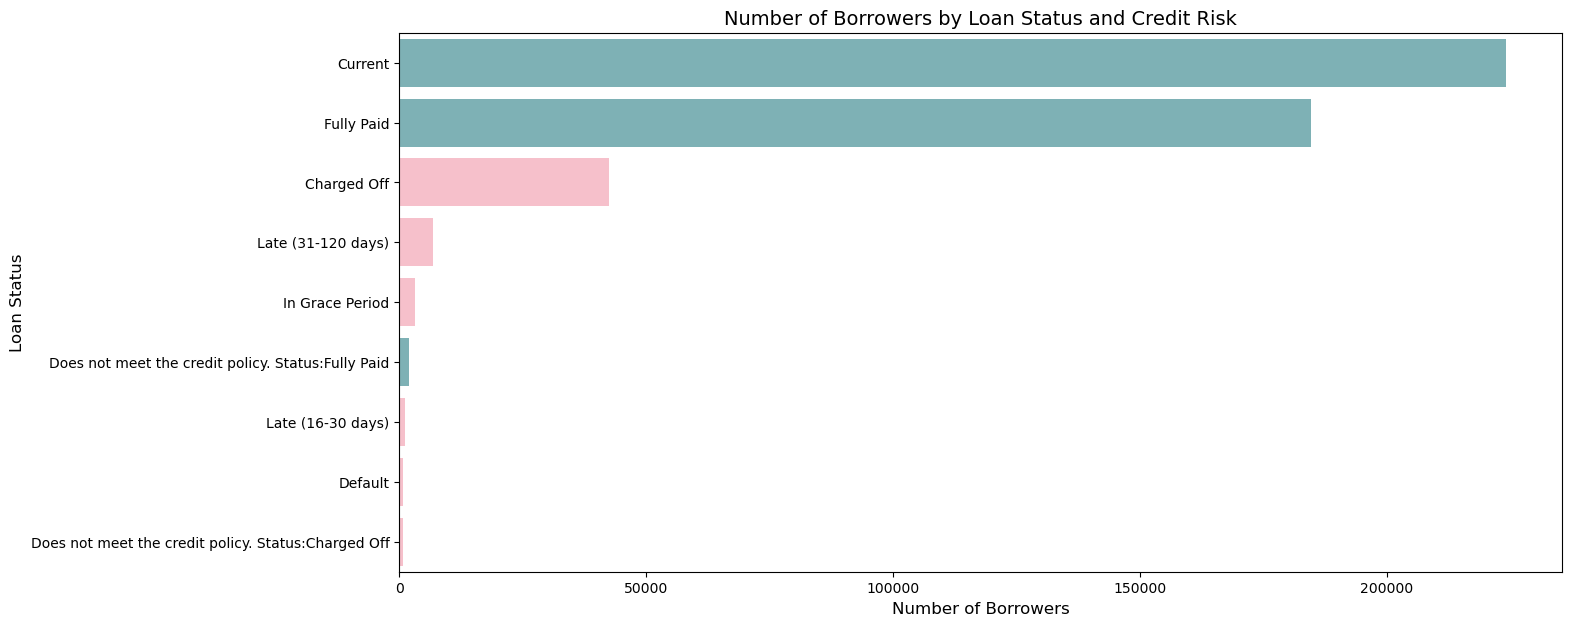

In [185]:
# visualize plot
color_mapping = {1: '#75B9BE', 0: '#FFB7C5'}

loan_status_counts = df['loan_status'].value_counts()
colors = df.drop_duplicates('loan_status').set_index('loan_status')['credit_risk'].map(color_mapping).to_dict()

plt.figure(figsize=(15, 7))
sns.barplot(x=loan_status_counts.values, 
            y=loan_status_counts.index, 
            palette=colors)

plt.xlabel('Number of Borrowers', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)
plt.title('Number of Borrowers by Loan Status and Credit Risk', fontsize=14)

plt.show()

In [186]:
# show the number of labels 
df['credit_risk'].value_counts()

credit_risk
1    410953
0     55332
Name: count, dtype: int64

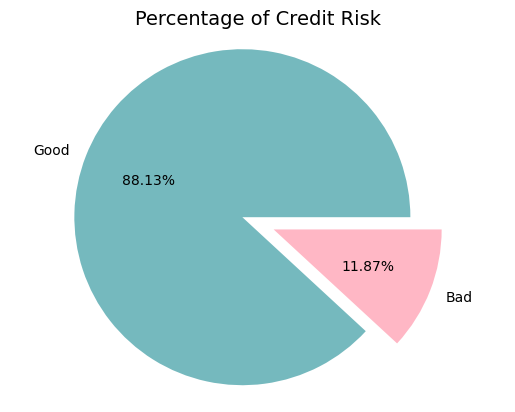

In [187]:
# percentage of credit risk
plt.pie(x=df['credit_risk'].value_counts(), 
        labels=['Good', 'Bad'], 
        autopct='%.2f%%', 
        colors=['#75B9BE', '#FFB7C5'],  
        explode=[0, 0.2])  

# add the title
plt.title('Percentage of Credit Risk', fontsize = 14)
plt.axis('equal')

# show the graph
plt.show()

#### 2.1 Univariate Analysis

#### 2.1.1 Numerical Data

#### 2.1.2 Categorical Data

#### 2.2 Bivariate Analysis 

#### 2.2.1 Numerical Data

#### 2.2.2 Categorical Data 

## 3. Data Preparation

#### 3.1 Handling Missing Values

In [188]:
# show columns with missing values
df_null = pd.DataFrame(df.isnull().sum()).reset_index(names = 'Features')
df_null = df_null.rename(columns={0: 'Null Values'})
df_null[df_null['Null Values'] > 0].reset_index(drop = True)

,Features,Null Values
0,emp_length,21008
1,annual_inc,4
2,delinq_2yrs,29
3,inq_last_6mths,29
4,open_acc,29
5,pub_rec,29
6,revol_util,340
7,total_acc,29
8,last_pymnt_d,376
9,next_pymnt_d,227214


In [189]:
# data imputation with median and mode
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column].fillna(df[column].mode()[0], inplace=True)
    else: 
        df[column].fillna(df[column].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  466285 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466285 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

#### 3.2 Feature Engineering

In [190]:
# convert data type to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

In [191]:
# perform encoding
df['term'] = LabelEncoder().fit_transform(df['term'])
df['grade'] = LabelEncoder().fit_transform(df['grade'])
df['sub_grade'] = LabelEncoder().fit_transform(df['sub_grade'])
df['emp_length'] = df['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                             '8 years': 8, '9 years': 9, '10+ years': 10})
df['pymnt_plan'] = LabelEncoder().fit_transform(df['pymnt_plan'])
df['initial_list_status'] = LabelEncoder().fit_transform(df['initial_list_status'])

In [192]:
for cat in ['home_ownership', 'verification_status', 'purpose', 'addr_state']:
  df1 = pd.get_dummies(df[cat], prefix=cat)
  df  = df.drop(cat, axis = 1)
  df  = df.join(df1)

#### 3.3 Feature Selection
For feature selection, we will begin by calculating the mutual information score for each feature and selecting the top 30 features that provide valuable information for predicting the target variable. Next, we will compute the Pearson correlation to identify any multicollinearity or high correlation (> 0.7) among these 30 features and then refine the selection to the top 20 features.

#### 3.3.1 Mutual Information

In [161]:
# divide dataset to feature and target
X = df.drop(columns = 'credit_risk')
y = df['credit_risk']

# Perform mutual information
mutual_info_scores = mutual_info_classif(X, y)

ValueError: could not convert string to float: 'Dec-11'

In [ ]:
# Create new DataFrame for the mutual information result
df_mi = pd.DataFrame({'Features': X.columns, 'MI Scores': mutual_info_scores})
df_mi.sort_values('MI Scores', ascending = False, ignore_index = True, inplace = True)
df_mi

## Data Modelling

## Evaluation